<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل دوم: رگرسیون خطی
    </font>
    <br>
      نویسندگان:‌ سید امیرمحمد عیسی زاده
    <hr>
<br>
</font>
</div>


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        رگرسیون خطی از پایه
      </font>
      <hr />
در این قسمت ما از یک دیتاست ساده برای تخمین میزان محصول دو میوه(سیب  و پرتقال) با توجه به پارامتر های دما، میزان بارش و رطوبت در چندین منطقه استفاده میکنیم.
    <br>
      به این منظور دیتاست ساده ای را میسازیم:
    </font>
      


In [1]:
# We use numpy to define our inputs and targets
import numpy as np

In [2]:
# dataset (temp, rainfall, humidity, apples, oranges)
df = np.array([[73, 67, 43, 56, 70], 
                   [91, 88, 64, 81, 101], 
                   [87, 134, 58, 119, 133], 
                   [102, 43, 37, 22, 37], 
                   [69, 96, 70, 103, 119]], dtype='float32')

# reigons which are used as indexes
regions = ["Semnan", "Golestan", "Gilan", "Ghazvin", "Mazandaran"]

columns = ["Temp(F)", "Rainfall(mm)", "Humidity(%)", "Apples(ton)", "Oranges(ton)"]


  <div dir=rtl>
    <font face="XB Zar" size=4>
برای نمایش دیتاست از کتابخانه pandas استفاده میکنیم:
    </font>
      


In [3]:
import pandas as pd

In [4]:
# Creating dataframe using variable columns as columns and regions as index
df = pd.DataFrame(df, columns=columns, index=regions)

df

,Temp(F),Rainfall(mm),Humidity(%),Apples(ton),Oranges(ton)
Semnan,73.0,67.0,43.0,56.0,70.0
Golestan,91.0,88.0,64.0,81.0,101.0
Gilan,87.0,134.0,58.0,119.0,133.0
Ghazvin,102.0,43.0,37.0,22.0,37.0
Mazandaran,69.0,96.0,70.0,103.0,119.0


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
در رگرسیون خطی، هر مقدار خروجی(ستون های سیب و پرتقال)، به صورت جمع وزن داری از ستون های ورودی به اضافه یک مقدار ثابت در نظر گرفته میشوند:
      <br>
    </font>

```
apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
که به این معناست که خروجی های ما یک تابع خطی یا یک صفحه از ورودی ها است:
      <br>
    </font>

![linear-regression-graph](https://i.imgur.com/4DJ9f8X.png)


  <div dir=rtl id="columns">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        مفهوم رگرسیون خطی
      </font>
      <hr />
      آموزش مدل رگرسیون خطی، عملا همان پیدا کردن مقدار بهینه برای وزن ها(w11 و w12 و ... و w23 و b1 و b2) است. وزن های آموزش دیده شده، برای پیشبینی داده های جدید استفاده خواهند شد. برای بهتر کردن مدل، که همان پیدا کردن وزن های بهتر باشد، از optimizer استفاده میکنیم. optimizer مورد استفاده در این تمرین، gradient descent است.
      <br>
      دیتاست را به دو بخش X و Y قسمت میکنیم که X همان ورودی های ما و Y میزان بهره برداری از میوه ها یا همان خروجی ها هستند.
  </font>
  </div>

In [5]:
X = df.iloc[:, :3].to_numpy()
Y = df.iloc[:, 3:].to_numpy()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
برای کار کردن راحت تر با داده ها و استفاده از قابلیت های بیشتر از کتابخانه pytorch استفاده میکنیم: 
      <br>
    </font>

In [6]:
import torch

In [7]:
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)
print(X)
print(Y)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
حال باید به وزن ها و دو مقدار ثابت، مقدار اولیه بدهیم. روش های مختلفی برای این کار وجود دارند که ما از مقداردهی رندوم استفاده میکنیم:
      <br>
    </font>

In [8]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.2006, -0.5150,  0.3728],
        [ 0.6184,  0.2134,  1.3572]], requires_grad=True)
tensor([ 0.0215, -1.1809], requires_grad=True)


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
عملا فرم ماتریس خروجی(Y) به این فرم است:
      <br>
    </font>

![matrix-mult](https://i.imgur.com/WGXLFvA.png)


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
با توجه به شکل بالا، به راحتی میتوانیم مدل را تعریف کنیم:
      <br>
    </font>

In [9]:
# @ represent matrix multiplication in pytorch and .t transposes the matrix 
def lr_model(x):
    return x @ w.t() + b

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
این مدل را روی داده های ورودی، که همان X و W و B هستند تست میکنیم:
      <br>
    </font>

In [10]:
predictions = lr_model(X)
predictions

tensor([[ -3.8102, 116.6204],
        [ -3.1855, 160.7342],
        [-29.9141, 159.9316],
        [ 12.1289, 121.2915],
        [ -9.4808, 156.9785]], grad_fn=<AddBackward0>)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
حال معیاری برای میزان خطای مدل، تعریف میکنیم.
      <br>
      ما از معیار MSE(mean squared error) استفاده میکنیم که اخلاف توان دو پیش بینی ها نسبت به مقدار واقعی خروجی ها است.
      <br>
    </font>

In [11]:
# MSE loss
def mse_loss(pred, real):
    diff = pred - real
    return torch.sum(diff * diff) / diff.numel()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
تابع sum تمامی عناصر آن تنسور را با هم جمع میکند.
      در تابع mse_loss در ابتدا اختلاف ها را بین دو ماتریس پیدا میکنیم، سپس تمامی این اختلاف ها را با هم جمع میکنیم و در انتها تقسیم بر تعداد عناصر میکنیم.
      <br>
    </font>

In [12]:
loss = mse_loss(predictions, Y)
print(loss)

tensor(6060.3623, grad_fn=<DivBackward0>)


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
همانطور که از خود مقادیر عناصر پیش‌بینی شده واضح بود، اختلاف خیلی زیاد است. این اختلاف به این دلیل است که هیچ بهینه سازی‌ای در وزن ها انجام ندادیم و صرفا یک پیش بینی رندوم کردیم.
در بخش Gradient Descent نحوه بروزرسانی وزن ها توضیح داده شده است.
      <br>
    </font>

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      حال که مقدار خطا را بدست آوردیم و وزن ها و بایاس های فعلی را داریم، باید مقدار گرادیان را حساب کنیم.
    </font>

In [13]:
# Compute gradients
loss.backward()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      این تابع برای بدست آوردن اتوماتیک گرادیان ها با توجه به وزن ها و بایاس های فعلی میباشد، این تابع در صورتی قابل استفاده است که فیلد requires_grad در وزن ها و بایاس ها برابر با True باشد که در پایتورچ مقدار default این فیلد، True است
    </font>


  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      <font color="red" size=5>Gradient Descent</font>
      <hr />
      مقدار loss ما یک تابع درجه در از وزن ها و بایاس ها است. و وظیفه ما این است که آن را به کمترین مقدار خودش برسانیم.
        اگر به شکل پایین دقت کنیم، و با توجه به حساب دیفرانسیل، یک نقطه را در نظر بگیرید. دو حالت برای این نقطه ممکن است:
        <br>
         شیب یا همان گرادیان مثبت باشد:
        <br>
        1) اگر مقدار کمی عقب برویم، مقدار تابع کمتر میشود.
        <br>
        2)  اگر مقدار کمی جلو برویم، مقدار تابع بیشتر میشود.
        <br>
  </div>

![postive-gradient](https://i.imgur.com/WLzJ4xP.png)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         گرادیان منفی باشد:
      <br>
      1) اگر مقدار کمی عقب برویم، مقدار تابع بیشتر میشود.
      <br>
      2) اگر مقدار کمی جلو برویم، مقدار تابع کمتر میشود.
      <br>
    </font>

![negative=gradient](https://i.imgur.com/dvG2fxU.png)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
        بنابراین، در هر مرحله مقدار گرادیان را در عدد کوچکی ضرب میکنیم و وزن ها را از این مقدار کم میکنیم.
      این مقدار کوچک همان learning rate است که یکی از مهم ترین hyperparameter های هر مدل ماشین لرنینگ است.
      دو حالت نامطلوب برای learning rate محتمل است:
      <br>
      <ul>
  <li>مقدار کوچک تر از حد مطلوب: در این صورت مدل دیر همگرا میشود و مراحل بیشتری نیاز است، چون در هر مرحله مقدار بسیار کمی تغییر میکند.</li>
  <li>مقدار بیشتر از حد مطلوب: در این صورت مدل در نهایت با حالت مینیمم فاصله زیادی خواهد داشت.</li>
</ul>
      

<div class="center">
<img src="gradient_descent.avif" width="500"/>
</div>

In [14]:
def gradient_descent(w, b, lr=1e-5):
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
این تابع چندین نکته دارد که مختص به کار با pytorch است:
      <ul>
  <li>torch.no_grad: از این عبارت استفاده میکنیم تا به pytorch بفهمانیم که در حین تغییر مقدار وزن ها و بایاس ها نیازی به تغییر مقدار گرادیان ها نیست.</li>
  <li>grad : تابع تعبیه شده در pytorch برای محاسبه گرادیان ها</li>
  <li>zero: این تابع برای صفر کردن گرادیان ها استفاده میشود، در صورت عدم استفاده از این تابع، در مرحله های بعدی، مقادیر حساب شده با مقادیر فعلی جمع میشوند و نتیجه نامطلوبی به ما میدهد.</li>
</ul>
    </font>


  <div dir="rtl" id="intro">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        آموزش مدل
      </font>
      <hr />
       حال که همه بخش های مدل را بررسی کردیم، نوبت آزمایش آن است.
        یک بار تمامی مراحل را مرور میکنیم:
        <ol>
            <li>تولید پیش بینی با استفاده از وزن های فعلی</li>
            <li>محاسبه مقدار loss</li>
            <li>محاسبه گرادیان ها با توجه به وزن ها و بایاس ها</li>
            <li>آپدیت کردن وزن ها و بایاس ها</li>
            <li>صفر کردن مقدار گرادیان ها</li>
        </ol>
        <br>
        این کار ها را در چندین مرحله(epoch) انجام میدهیم.
        <br>
        حال باید تابعی را تعریف کنیم که این مراحل را انجام دهد.
       </font>
    </div>

In [15]:
def train_model(n_epoches, lr):
    losses = []
    for i in range(n_epoches):
        # generating the predictions 
        predictions = lr_model(X)
        # calculating the loss
        loss = mse_loss(predictions, Y)
        # detach().numpy() is used for converting tensor to array(our array has one value) 
        losses.append(loss.detach().numpy())
        # calculating gradients
        loss.backward()
        # updating weights and biases
        gradient_descent(w, b, lr)
    return losses

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         مدلمان را در 100 مرحله تست میکنیم و مقدار learning rate را  1e-5 میگذاریم.
      <br>
      همچنین loss ها را در هر مرحله ذخیره میکنیم.
    </font>

In [16]:
lr = 1e-5
n_epoches = 100
losses = train_model(n_epoches, lr)

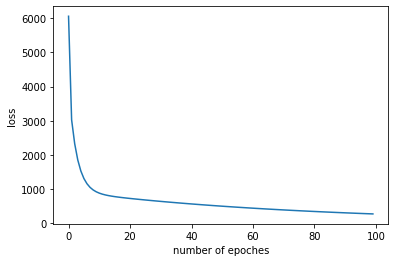

In [17]:
import matplotlib.pyplot as plt
  
# x axis values
x = [i for i in range(n_epoches)]
# corresponding y axis values
y = losses
  
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('number of epoches')
# naming the y axis
plt.ylabel('loss')
  
# function to show the plot
plt.show()

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         همانطور که مشاهده میکنید، در ابتدا به مقدار زیادی از خطا کم میشود و رفته رفته اختلاف خطا ها در دو مرحله متوالی کمتر میشود تا در نهایت در همسایگی کوچکی از مینیمم، تغییر کند. هر چه learning rate را کمتر کنیم طول این همسایگی کمتر میشود.
    </font>

   <div dir="rtl" id="intro">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        رگرسیون خطی با استفاده از torch.nn
      </font>
       <br>
      حال دیتاست داده شده را با استفاده از مدل آماده linear regression در pytorch یاد میگیریم.
        <br>
        از کتابخانه TensorDataset برای ساختن دیتاست train استفاده میکنیم.
       </font>
    </div>

In [18]:
from torch.utils.data import TensorDataset

In [19]:
# Define dataset
train_ds = TensorDataset(X, Y)
train_ds[:]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         از DataLoader خود pytorch برای load کردن دیتا استفاده میکنیم. با این کتابخانه میتوانیم دیتای train را به چندین branch تقسیم کنیم و همچنین قابلیت هایی از جمله shuffle کردن دیتا و ... به ما میدهد.
    </font>

In [20]:
from torch.utils.data import DataLoader

In [21]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         حال از مدل آماده pytorch استفاده میکنیم.
      در این حالت نیازی به تعریف وزن و بایاس نیست و خود این مدل این کار را میکند.
    </font>

In [22]:
import torch.nn as nn

In [23]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.4124,  0.0241, -0.3418],
        [-0.2332,  0.3364, -0.4434]], requires_grad=True)
Parameter containing:
tensor([ 0.5499, -0.3642], requires_grad=True)


<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         برای تعریف loss function از کتابخانه nn.functional استفاده میکنیم.
    </font>

In [24]:
# Import nn.functional
import torch.nn.functional as F

In [25]:
# Define loss function
loss_fn = F.mse_loss

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
         برای optimizer از کتابخانه torch.optim استفاده میکنیم.
    </font>

In [26]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

<div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
تابع model.parameters وزن ها و بایاس ها را برمیگرداند.
      <br>
      حال باید تابعی برای آموزش مدل بنویسیم، دقیقا همان مراحل قبلی را تکرار میکنیم.
    </font>

In [27]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [28]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 801.0750
Epoch [20/100], Loss: 516.7050
Epoch [30/100], Loss: 459.6240
Epoch [40/100], Loss: 412.9379
Epoch [50/100], Loss: 371.7442
Epoch [60/100], Loss: 335.3192
Epoch [70/100], Loss: 303.0954
Epoch [80/100], Loss: 274.5740
Epoch [90/100], Loss: 249.3158
Epoch [100/100], Loss: 226.9340


   <div dir="rtl" id="intro">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        torch.nn بر روی کشتی تایتانیک!!
      </font>
       <br>
      حال دیتاست داده شده را با استفاده از مدل آماده linear regression در pytorch یاد میگیریم.
        <br>
        از کتابخانه TensorDataset برای ساختن دیتاست train استفاده میکنیم.
       </font>
    </div>

In [29]:
dataset_training = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dataset_testing = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')